## Reading Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
sales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NYC rolling sales/nyc-rolling-sales.csv')
sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Cleaning Data

### Rename columns

Rename columns for convenience.

In [4]:
sales.rename(columns={'BUILDING CLASS CATEGORY': 'BUILDING_CLASS_CATEGORY',
                      'TAX CLASS AT PRESENT': 'TAX_CLASS_AT_PRESENT',
                      'BUILDING CLASS AT PRESENT': 'BUILDING_CLASS_AT_PRESENT',
                      'APARTMENT NUMBER': 'APARTMENT_NUMBER',
                      'ZIP CODE': 'ZIP_CODE',
                      'RESIDENTIAL UNITS': 'RESIDENTIAL_UNITS',
                      'COMMERCIAL UNITS': 'COMMERCIAL_UNITS',
                      'TOTAL UNITS': 'TOTAL_UNITS',
                      'LAND SQUARE FEET': 'LAND_SQUARE_FEET',
                      'GROSS SQUARE FEET': 'GROSS_SQUARE_FEET',
                      'YEAR BUILT': 'YEAR_BUILT',
                      'TAX CLASS AT TIME OF SALE': 'TAX_CLASS_AT_TIME_OF_SALE',
                      'BUILDING CLASS AT TIME OF SALE': 'BUILDING_CLASS_AT_TIME_OF_SALE',
                      'SALE PRICE': 'SALE_PRICE',
                      'SALE DATE': 'SALE_DATE'}, inplace=True)

sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### 1. Unnamed: 0

It is an index, hence can be removed.

In [5]:
sales.drop('Unnamed: 0', axis=1, inplace=True)

### 2. BOROUGH

In [6]:
sales['BOROUGH'].describe()

count    84548.000000
mean         2.998758
std          1.289790
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: BOROUGH, dtype: float64

In [7]:
sales['BOROUGH'] = sales['BOROUGH'].astype('category')

### 3. NEIGHBORHOOD

In [8]:
sales['NEIGHBORHOOD'].describe()

count              84548
unique               254
top       FLUSHING-NORTH
freq                3068
Name: NEIGHBORHOOD, dtype: object

In [9]:
sales['NEIGHBORHOOD'].value_counts(dropna = False)

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
VAN CORTLANDT PARK             2
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
BRONX PARK                     1
PELHAM BAY                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

In [10]:
sales.drop('NEIGHBORHOOD', axis=1, inplace=True)

### 4. BUILDING CLASS CATEGORY

In [11]:
sales['BUILDING_CLASS_CATEGORY'].describe()

count                                           84548
unique                                             47
top       01 ONE FAMILY DWELLINGS                    
freq                                            18235
Name: BUILDING_CLASS_CATEGORY, dtype: object

In [12]:
sales['BUILDING_CLASS_CATEGORY'].value_counts(dropna=False)

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

Will label encode the column BUILDING_CLASS_CATEGORY later!

### 5. TAX CLASS AT PRESENT

In [13]:
sales['TAX_CLASS_AT_PRESENT'].describe()

count     84548
unique       11
top           1
freq      38633
Name: TAX_CLASS_AT_PRESENT, dtype: object

In [14]:
sales['TAX_CLASS_AT_PRESENT'].value_counts(dropna=False)

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX_CLASS_AT_PRESENT, dtype: int64

Convert the column to integer.

In [15]:
#Get the first character of Tax class
sales['TAX_CLASS_AT_PRESENT'] = sales['TAX_CLASS_AT_PRESENT'].apply(lambda x: x[0:1])

#Replace blank value
sales['TAX_CLASS_AT_PRESENT'].replace(' ', '-1', inplace=True)
sales['TAX_CLASS_AT_PRESENT'] = sales['TAX_CLASS_AT_PRESENT'].astype(int)
sales['TAX_CLASS_AT_PRESENT'].replace(-1, np.nan, inplace=True)

sales['TAX_CLASS_AT_PRESENT'].describe()

count    83810.000000
mean         1.651438
std          0.816539
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: TAX_CLASS_AT_PRESENT, dtype: float64

In [16]:
sales.head()

,BOROUGH,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,07 RENTALS - WALKUP APARTMENTS,2.0,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,07 RENTALS - WALKUP APARTMENTS,2.0,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,07 RENTALS - WALKUP APARTMENTS,2.0,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [17]:
sales['TAX_CLASS_AT_PRESENT'] = sales['TAX_CLASS_AT_PRESENT'].astype('category')

### 6. BLOCK

In [18]:
sales['BLOCK'].describe()

count    84548.000000
mean      4237.218976
std       3568.263407
min          1.000000
25%       1322.750000
50%       3311.000000
75%       6281.000000
max      16322.000000
Name: BLOCK, dtype: float64

### 7. LOT

In [19]:
sales['LOT'].describe()

count    84548.000000
mean       376.224015
std        658.136814
min          1.000000
25%         22.000000
50%         50.000000
75%       1001.000000
max       9106.000000
Name: LOT, dtype: float64

### 8. EASE-MENT

In [20]:
sales['EASE-MENT'].describe()

count     84548
unique        1
top            
freq      84548
Name: EASE-MENT, dtype: object

Since all the 84,548 values are null values, we can delete the column.

In [21]:
sales.drop('EASE-MENT', axis=1, inplace=True)

### 9. BUILDING CLASS AT PRESENT

In [22]:
sales['BUILDING_CLASS_AT_PRESENT'].describe()

count     84548
unique      167
top          D4
freq      12663
Name: BUILDING_CLASS_AT_PRESENT, dtype: object

In [23]:
sales['BUILDING_CLASS_AT_PRESENT'].value_counts(dropna=False).sort_values(ascending=False)

D4    12663
R4    12482
A1     6753
A5     5683
B2     4923
      ...  
Y1        1
R7        1
J9        1
M2        1
I3        1
Name: BUILDING_CLASS_AT_PRESENT, Length: 167, dtype: int64

### 10. ADDRESS

In [24]:
sales['ADDRESS'].value_counts(dropna=False)

131-05 40TH   ROAD             210
429 KENT AVENUE                158
169 WEST 95TH   STREET         153
131-03 40TH   ROAD             147
265 STATE STREET               127
                              ... 
1829 TENBROECK AVENUE            1
155-64 115TH   AVENUE            1
106-15 QUEENS BOULEVARD, 3S      1
36 SUTTON PLACE SOUTH, 15A       1
310 WEST 106TH STREET, 2E        1
Name: ADDRESS, Length: 67563, dtype: int64

Since there's too many unique values (67,563), we can delete the column.

In [25]:
sales.drop('ADDRESS', axis=1, inplace=True)

### 11. APARTMENT NUMBER

In [26]:
sales['APARTMENT_NUMBER'].describe()

count     84548
unique     3989
top            
freq      65496
Name: APARTMENT_NUMBER, dtype: object

The column has more null values and unique values that may clash with the other columns.

In [27]:
sales.drop('APARTMENT_NUMBER', axis=1, inplace=True)

### 12. ZIP CODE

In [28]:
sales['ZIP_CODE'].describe()

count    84548.000000
mean     10731.991614
std       1290.879147
min          0.000000
25%      10305.000000
50%      11209.000000
75%      11357.000000
max      11694.000000
Name: ZIP_CODE, dtype: float64

Let's check how many rows have zipcode 0.

In [29]:
df1 = sales[sales['ZIP_CODE'] == 0][['ZIP_CODE']]
df1.shape

(982, 1)

982 rows with zipcode 0. Areas with zipcode 0 are areas with no proper zipcode or address. So, let's delete those 982 rows.

In [30]:
sales = sales[sales['ZIP_CODE'] != 0]
sales.shape

(83566, 17)

### 13. RESIDENTIAL UNITS

In [31]:
sales['RESIDENTIAL_UNITS'].describe()

count    83566.000000
mean         2.048477
std         16.817594
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1844.000000
Name: RESIDENTIAL_UNITS, dtype: float64

If there are residential units, then 1, else 0.

In [32]:
sales['RESIDENTIAL_UNITS'] = np.where(sales['RESIDENTIAL_UNITS']>0, 1, 0)

#df['elderly'] = np.where(df['age']>=50, 'yes', 'no')

In [33]:
sales['RESIDENTIAL_UNITS'].describe()

count    83566.000000
mean         0.714717
std          0.451552
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: RESIDENTIAL_UNITS, dtype: float64

In [34]:
sales['RESIDENTIAL_UNITS'].value_counts(dropna=False)

1    59726
0    23840
Name: RESIDENTIAL_UNITS, dtype: int64

### 14. COMMERCIAL UNITS

In [35]:
sales['COMMERCIAL_UNITS'].describe()

count    83566.000000
mean         0.195702
std          8.764194
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2261.000000
Name: COMMERCIAL_UNITS, dtype: float64

If there are commercial units, then 1, else 0.

In [36]:
sales['COMMERCIAL_UNITS'] = np.where(sales['COMMERCIAL_UNITS']>0, 1, 0)

In [37]:
sales['COMMERCIAL_UNITS'].value_counts(dropna=False)

0    78455
1     5111
Name: COMMERCIAL_UNITS, dtype: int64

### 15. TOTAL UNITS

In [38]:
sales['TOTAL_UNITS'].describe()

count    83566.000000
mean         2.274896
std         19.082216
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2261.000000
Name: TOTAL_UNITS, dtype: float64

Total units = residential units + commercial units

In [39]:
sales = sales[(sales['TOTAL_UNITS'] > 0) & (sales['TOTAL_UNITS'] < 2261)]

### 16. LAND SQUARE FEET and 17. GROSS SQUARE FEET

In [40]:
sales['LAND_SQUARE_FEET'].replace(to_replace=' -  ', value='-1',inplace=True)
sales['GROSS_SQUARE_FEET'].replace(to_replace=' -  ', value='-1',inplace=True)

In [41]:
cols = ['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']
for col in cols:
  sales[col] = sales[col].astype(int)

In [42]:
sales['LAND_SQUARE_FEET'].replace(to_replace=-1, value=np.nan, inplace=True)
sales['GROSS_SQUARE_FEET'].replace(to_replace=-1, value=np.nan, inplace=True)

In [43]:
sales[['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']].describe()

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET
count,5.193100e+04,5.171800e+04
mean,3.757419e+03,4.389823e+03
std,3.367582e+04,3.612827e+04
min,0.000000e+00,0.000000e+00
25%,1.810000e+03,1.226500e+03
50%,2.442000e+03,1.812000e+03
75%,3.713000e+03,2.700000e+03
max,4.228300e+06,3.750565e+06


Since there are values with 0 square feet, let's replace 0 with null values.

In [44]:
sales[['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']].isnull().sum()

LAND_SQUARE_FEET     12808
GROSS_SQUARE_FEET    13021
dtype: int64

In [45]:
print(sales[sales['LAND_SQUARE_FEET']==0].shape, sales[sales['GROSS_SQUARE_FEET']==0].shape)

(6193, 17) (6302, 17)


In [46]:
sales['LAND_SQUARE_FEET'].replace(to_replace=0, value=np.nan, inplace=True)
sales['GROSS_SQUARE_FEET'].replace(to_replace=0, value=np.nan, inplace=True)

sales[['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']].isnull().sum()

LAND_SQUARE_FEET     19001
GROSS_SQUARE_FEET    19323
dtype: int64

### 18. YEAR BUILT

In [47]:
sales['YEAR_BUILT'].describe()

count    64739.000000
mean      1828.613000
std        475.045686
min          0.000000
25%       1920.000000
50%       1935.000000
75%       1983.000000
max       2017.000000
Name: YEAR_BUILT, dtype: float64

In [48]:
sales[sales['YEAR_BUILT']==0].shape

(4071, 17)

In [49]:
sales['YEAR_BUILT'].replace(0, np.nan, inplace=True)

### 19. TAX CLASS AT TIME OF SALE

In [50]:
sales['TAX_CLASS_AT_TIME_OF_SALE'].describe()

count    64739.000000
mean         1.542084
std          0.857481
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: TAX_CLASS_AT_TIME_OF_SALE, dtype: float64

In [51]:
sales['TAX_CLASS_AT_TIME_OF_SALE'] = sales['TAX_CLASS_AT_TIME_OF_SALE'].astype('category')

### 20. BUILDING CLASS AT TIME OF SALE

In [52]:
sales['BUILDING_CLASS_AT_TIME_OF_SALE'].describe()

count     64739
unique      154
top          R4
freq      12459
Name: BUILDING_CLASS_AT_TIME_OF_SALE, dtype: object

### 21. SALE DATE

In [53]:
sales['SALE_DATE'].value_counts(dropna=False)

2016-10-28 00:00:00    425
2016-12-22 00:00:00    420
2017-06-15 00:00:00    420
2017-05-25 00:00:00    408
2017-03-30 00:00:00    405
                      ... 
2017-01-08 00:00:00      2
2017-08-20 00:00:00      2
2016-11-27 00:00:00      2
2017-08-13 00:00:00      1
2017-06-04 00:00:00      1
Name: SALE_DATE, Length: 364, dtype: int64

Create sale year, sale month columns.

In [54]:
#Convert the column to datetime 
sales['SALE_DATE'] = pd.to_datetime(sales['SALE_DATE'])

#Extract sale year and sale month and store in new variables
sales['SALE_YEAR'] = sales['SALE_DATE'].dt.year
sales['SALE_MONTH'] = sales['SALE_DATE'].dt.month

#Delete sale date column
sales.drop('SALE_DATE', axis=1, inplace=True)

sales.shape

(64739, 18)

### 22. SALE PRICE

In [55]:
sales['SALE_PRICE'].describe()

count     64739
unique     8288
top         -  
freq      12417
Name: SALE_PRICE, dtype: object

Convert the sale price datatype to integer.

In [56]:
#Replace the '-' values with random value, in this case -1
sales['SALE_PRICE'].replace(to_replace=' -  ', value='-1',inplace=True)

#Change the datatype
sales['SALE_PRICE'] = sales['SALE_PRICE'].astype(int)

#Replace the previously entered random value to null value
sales['SALE_PRICE'].replace(to_replace=-1, value=np.nan, inplace=True)

## Preprocessing

<b>Columns deleted</b>
<ul>
<li>Unnamed: 0</li>
<li>EASE-MENT</li>
<li>NEIGHBORHOOD</li>
<li>ADDRESS</li>
<li>APARTMENT NUMBER</li>
<li>SALE DATE</li>
</ul>

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
sales.head()

,BOROUGH,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR,SALE_MONTH
0,1,07 RENTALS - WALKUP APARTMENTS,2.0,392,6,C2,10009,1,0,5,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,7
1,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,26,C7,10009,1,1,31,4616.0,18690.0,1900.0,2,C7,NaN,2016,12
2,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,39,C7,10009,1,1,17,2212.0,7803.0,1900.0,2,C7,NaN,2016,12
3,1,07 RENTALS - WALKUP APARTMENTS,2.0,402,21,C4,10009,1,0,10,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,9
4,1,07 RENTALS - WALKUP APARTMENTS,2.0,404,55,C2,10009,1,0,6,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,11


In [59]:
sales.isnull().sum().sort_values(ascending=False)

GROSS_SQUARE_FEET                 19323
LAND_SQUARE_FEET                  19001
SALE_PRICE                        12417
YEAR_BUILT                         4071
SALE_MONTH                            0
ZIP_CODE                              0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING_CLASS_AT_PRESENT             0
COMMERCIAL_UNITS                      0
RESIDENTIAL_UNITS                     0
SALE_YEAR                             0
TOTAL_UNITS                           0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
BOROUGH                               0
dtype: int64

### Tax class at present
Since there's less than 500 rows with null values for this column, we can delete those rows.

In [60]:
sales = sales.dropna(subset=['TAX_CLASS_AT_PRESENT'])
sales.shape

(64739, 18)

### Year built

In [61]:
sales.corr()['YEAR_BUILT']

BLOCK               -0.092052
LOT                  0.477903
ZIP_CODE            -0.192530
RESIDENTIAL_UNITS   -0.141085
COMMERCIAL_UNITS    -0.108524
TOTAL_UNITS         -0.019523
LAND_SQUARE_FEET     0.029319
GROSS_SQUARE_FEET    0.034614
YEAR_BUILT           1.000000
SALE_PRICE           0.007735
SALE_YEAR            0.003915
SALE_MONTH          -0.006550
Name: YEAR_BUILT, dtype: float64

Since Lot is highest correlated with year built, let's impute the values using LOT column.

In [62]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

data_with_null = sales[['LOT', 'YEAR_BUILT']]
data_without_null = data_with_null.dropna()
print(data_with_null.shape, data_without_null.shape)

#Independent features:
train_data_x = data_without_null.iloc[:,:1]
#Target variable:
train_data_y = data_without_null.iloc[:,1]

#Train the data
linreg.fit(train_data_x, train_data_y)

(64739, 2) (60668, 2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#Predict for the whole dataset and replace only the missing values
test_data = data_with_null.iloc[:,:1]
yrbuilt_predicted = pd.DataFrame(linreg.predict(test_data), columns=['YEAR_BUILT'])

In [64]:
yrbuilt_predicted.head()

,YEAR_BUILT
0,1940.772292
1,1941.360992
2,1941.743646
3,1941.213817
4,1942.214605


In [65]:
yrbuilt_predicted['YEAR_BUILT'] = yrbuilt_predicted['YEAR_BUILT'].astype(int)
yrbuilt_predicted.head()

,YEAR_BUILT
0,1940
1,1941
2,1941
3,1941
4,1942


In [66]:
sales['YEAR_BUILT'].fillna(yrbuilt_predicted['YEAR_BUILT'], inplace=True)

In [67]:
sales.isnull().sum().sort_values(ascending=False)

GROSS_SQUARE_FEET                 19323
LAND_SQUARE_FEET                  19001
SALE_PRICE                        12417
YEAR_BUILT                          182
SALE_MONTH                            0
ZIP_CODE                              0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING_CLASS_AT_PRESENT             0
COMMERCIAL_UNITS                      0
RESIDENTIAL_UNITS                     0
SALE_YEAR                             0
TOTAL_UNITS                           0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
BOROUGH                               0
dtype: int64

Let's remove the remaining 30 rows.

In [68]:
sales = sales.dropna(subset=['YEAR_BUILT'])
sales.shape

(64557, 18)

In [69]:
sales.isnull().sum().sort_values(ascending=False)

GROSS_SQUARE_FEET                 19143
LAND_SQUARE_FEET                  18822
SALE_PRICE                        12332
SALE_MONTH                            0
ZIP_CODE                              0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING_CLASS_AT_PRESENT             0
COMMERCIAL_UNITS                      0
RESIDENTIAL_UNITS                     0
SALE_YEAR                             0
TOTAL_UNITS                           0
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
BOROUGH                               0
dtype: int64

### Land Square Feet and Gross Square Feet

In [70]:
sales['LAND_SQUARE_FEET'] = sales['LAND_SQUARE_FEET'].fillna(sales['LAND_SQUARE_FEET'].mean())
sales['GROSS_SQUARE_FEET'] = sales['GROSS_SQUARE_FEET'].fillna(sales['GROSS_SQUARE_FEET'].mean())

In [71]:
sales.isnull().sum().sort_values(ascending=False)

SALE_PRICE                        12332
SALE_MONTH                            0
RESIDENTIAL_UNITS                     0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING_CLASS_AT_PRESENT             0
ZIP_CODE                              0
COMMERCIAL_UNITS                      0
SALE_YEAR                             0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                      0
GROSS_SQUARE_FEET                     0
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
BOROUGH                               0
dtype: int64

In [72]:
sales.to_csv('NYC Sales modified.csv', index=False)

In [73]:
sales.head()

,BOROUGH,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR,SALE_MONTH
0,1,07 RENTALS - WALKUP APARTMENTS,2.0,392,6,C2,10009,1,0,5,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,7
1,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,26,C7,10009,1,1,31,4616.0,18690.0,1900.0,2,C7,NaN,2016,12
2,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,39,C7,10009,1,1,17,2212.0,7803.0,1900.0,2,C7,NaN,2016,12
3,1,07 RENTALS - WALKUP APARTMENTS,2.0,402,21,C4,10009,1,0,10,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,9
4,1,07 RENTALS - WALKUP APARTMENTS,2.0,404,55,C2,10009,1,0,6,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,11


In [74]:
sales.isnull().sum().sort_values(ascending=False)

SALE_PRICE                        12332
SALE_MONTH                            0
RESIDENTIAL_UNITS                     0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING_CLASS_AT_PRESENT             0
ZIP_CODE                              0
COMMERCIAL_UNITS                      0
SALE_YEAR                             0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                      0
GROSS_SQUARE_FEET                     0
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
BOROUGH                               0
dtype: int64

## EDA

In [75]:
sales.shape

(64557, 18)

In [76]:
train = sales[sales['SALE_PRICE'].notnull()]
test = sales[sales['SALE_PRICE'].isnull()]

print(train.shape, test.shape)

(52225, 18) (12332, 18)


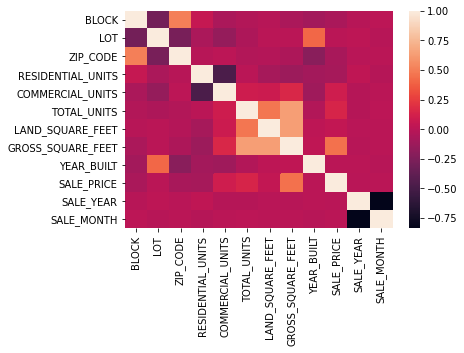

In [77]:
#correlation between the features
corr = train.corr()
sns.heatmap(corr)

In [78]:
#numeric correlation
corr['SALE_PRICE'].sort_values(ascending=False)

SALE_PRICE           1.000000
GROSS_SQUARE_FEET    0.454426
TOTAL_UNITS          0.145670
COMMERCIAL_UNITS     0.100679
LAND_SQUARE_FEET     0.040544
YEAR_BUILT           0.007830
LOT                  0.007219
SALE_MONTH           0.002610
SALE_YEAR           -0.002100
BLOCK               -0.064360
ZIP_CODE            -0.076569
RESIDENTIAL_UNITS   -0.083887
Name: SALE_PRICE, dtype: float64

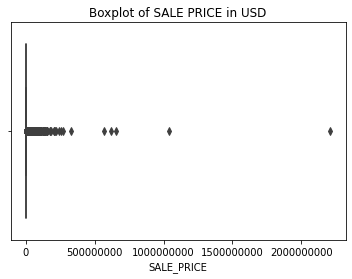

In [79]:
sns.boxplot(x='SALE_PRICE', data=train)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

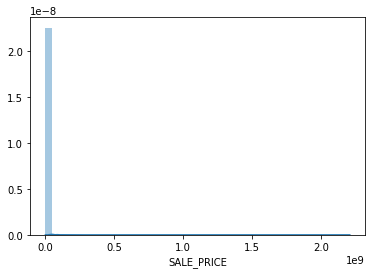

In [80]:
sns.distplot(train['SALE_PRICE'])

In [81]:
# Remove observations that fall outside those caps
train = train[(train['SALE_PRICE'] > 100000) & (train['SALE_PRICE'] < 5000000)]
train.shape

(38971, 18)

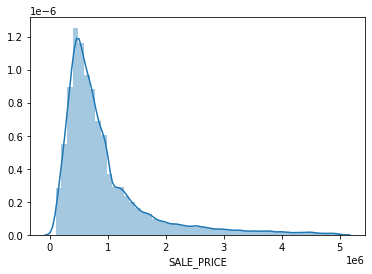

In [82]:
sns.distplot(train['SALE_PRICE'])

0.268904249457906


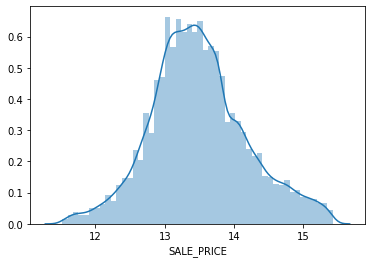

In [83]:
salesprice=np.log(train['SALE_PRICE'])
print(salesprice.skew())
sns.distplot(salesprice)

In [84]:
train[["TOTAL_UNITS", "SALE_PRICE"]].groupby(['TOTAL_UNITS'], as_index=False).count().sort_values(by='SALE_PRICE', ascending=False)

,TOTAL_UNITS,SALE_PRICE
0,1,24825
1,2,9591
2,3,2737
3,4,709
5,6,368
...,...,...
40,56,1
39,51,1
33,35,1
37,47,1


In [85]:
train = train[train['TOTAL_UNITS'] != 1866]
train.shape

(38970, 18)

In [86]:
test = test[test['TOTAL_UNITS'] != 1866]
test.shape

(12331, 18)

In [87]:
sales.head()

,BOROUGH,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_YEAR,SALE_MONTH
0,1,07 RENTALS - WALKUP APARTMENTS,2.0,392,6,C2,10009,1,0,5,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,7
1,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,26,C7,10009,1,1,31,4616.0,18690.0,1900.0,2,C7,NaN,2016,12
2,1,07 RENTALS - WALKUP APARTMENTS,2.0,399,39,C7,10009,1,1,17,2212.0,7803.0,1900.0,2,C7,NaN,2016,12
3,1,07 RENTALS - WALKUP APARTMENTS,2.0,402,21,C4,10009,1,0,10,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,9
4,1,07 RENTALS - WALKUP APARTMENTS,2.0,404,55,C2,10009,1,0,6,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,11


In [88]:
sales = sales[sales['TOTAL_UNITS']!=1866]
sales.shape

(64555, 18)

In [89]:
sales.drop(['BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_TIME_OF_SALE'], axis=1, inplace=True)

In [90]:
#Select the variables to be one-hot encoded
one_hot = ['BOROUGH', 'BUILDING_CLASS_CATEGORY','TAX_CLASS_AT_PRESENT','TAX_CLASS_AT_TIME_OF_SALE']

# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(sales[one_hot])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64555 entries, 0 to 84547
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   BOROUGH_1                                                             64555 non-null  uint8
 1   BOROUGH_2                                                             64555 non-null  uint8
 2   BOROUGH_3                                                             64555 non-null  uint8
 3   BOROUGH_4                                                             64555 non-null  uint8
 4   BOROUGH_5                                                             64555 non-null  uint8
 5   BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS                       64555 non-null  uint8
 6   BUILDING_CLASS_CATEGORY_02 TWO FAMILY DWELLINGS                       64555 non-null  uint8
 7   BUILDING_CLAS

In [91]:
# Replacing categorical columns with dummies
df = sales.drop(one_hot,axis=1)
df = pd.concat([df, one_hot_encoded] ,axis=1)
df.shape

(64555, 68)

In [92]:
train = df[df['SALE_PRICE'].notnull()]
test = df[df['SALE_PRICE'].isnull()]

print(train.shape, test.shape)

(52224, 68) (12331, 68)


In [93]:
y_train = train['SALE_PRICE']
X_train = train.drop('SALE_PRICE', axis = 1)

y_test = test['SALE_PRICE']
X_test = test.drop('SALE_PRICE', axis=1)

In [94]:
#Scale the numerical features
from sklearn.preprocessing import StandardScaler

numeric_data = X_train.select_dtypes(include=[np.number])
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train[numeric_data.columns])
X_test = scaler.transform(X_test[numeric_data.columns])

In [95]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(52224, 67) (52224,)
(12331, 67) (12331,)


## Model Building

In [96]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
print(tf.__version__)

2.3.0


In [111]:
!pip install -q git+https://github.com/tensorflow/docs

In [112]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

### 1. Neural Network Model 1

In [104]:
def build_model():
  model = keras.Sequential([
    layers.Dense(400, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(400, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [105]:
model = build_model()

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               27200     
_________________________________________________________________
dense_5 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 401       
Total params: 188,001
Trainable params: 188,001
Non-trainable params: 0
_________________________________________________________________


In [107]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12796   ],
       [-0.07471909],
       [-0.10280555],
       [-0.08146385],
       [-0.3530579 ],
       [-0.21977189],
       [-0.08119237],
       [ 0.4235847 ],
       [ 0.16649652],
       [-0.29117242]], dtype=float32)

In [113]:
EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:210758994493440.0000,  mae:1540239.8750,  mse:210758994493440.0000,  val_loss:2819186753536.0000,  val_mae:534042.0000,  val_mse:2819186753536.0000,  
....................................................................................................
Epoch: 100, loss:115638051799040.0000,  mae:1329024.0000,  mse:115638051799040.0000,  val_loss:1087841194999808.0000,  val_mae:24362520.0000,  val_mse:1087841194999808.0000,  
....................................................................................................
Epoch: 200, loss:92115958759424.0000,  mae:1263424.2500,  mse:92115958759424.0000,  val_loss:3351056964648960.0000,  val_mae:42921320.0000,  val_mse:3351056964648960.0000,  
....................................................................................................
Epoch: 300, loss:84276594868224.0000,  mae:1238688.6250,  mse:84276594868224.0000,  val_loss:6108832379961344.0000,  val_mae:57927548.0000,  val_mse:6108832379961344.0000,  
......